In [0]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   321  100   321    0     0    642      0 --:--:-- --:--:-- --:--:--   640
Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir + 'l4-collab')
dest = path
dest.mkdir(parents=True, exist_ok=True)

In [0]:
user,item,title = 'userId','movieId','title'

In [0]:
path = untar_data(URLs.ML_SAMPLE, dest=dest)
path

PosixPath('/content/gdrive/My Drive/fastai-v3/l4-collab/movie_lens_sample')

In [0]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [0]:
data = CollabDataBunch.from_df(ratings, seed=42)

In [0]:
y_range = [0, 5.5]

In [0]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [0]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.632640,0.982235,00:00
1,0.863508,0.661777,00:00
2,0.644777,0.658472,00:00


In [0]:
path = Path(base_dir + 'l4-collab/ml-100k')
path

PosixPath('/content/gdrive/My Drive/fastai-v3/l4-collab/ml-100k')

In [0]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None, names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [0]:
movies = pd.read_csv(path/'u.item', delimiter='|', encoding='latin-1', header=None, 
                     names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()                                                                                                                               

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
len(ratings)

100000

In [0]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

In [0]:
data.show_batch()

userId,title,target
851,Richard III (1995),3.0
445,Jerry Maguire (1996),2.0
406,Benny & Joon (1993),2.0
788,Eraser (1996),3.0
518,Tin Cup (1996),4.0


In [0]:
y_range = [0,5.5]

In [0]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


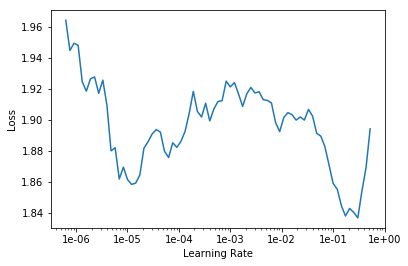

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.943265,0.950446,00:09
1,0.893712,0.885086,00:09
2,0.761819,0.838703,00:09
3,0.656280,0.816108,00:09
4,0.544093,0.815822,00:09


In [0]:
learn.save('dotprod')

In [0]:
learn.load('dotprod')

CollabLearner(data=TabularDataBunch;

Train: LabelList (90000 items)
x: CollabList
userId 196; title Kolya (1996); ,userId 63; title Kolya (1996); ,userId 226; title Kolya (1996); ,userId 154; title Kolya (1996); ,userId 306; title Kolya (1996); 
y: FloatList
3.0,3.0,5.0,3.0,5.0
Path: .;

Valid: LabelList (10000 items)
x: CollabList
userId 498; title Casino (1995); ,userId 642; title Pocahontas (1995); ,userId 58; title 2001: A Space Odyssey (1968); ,userId 495; title Cat People (1982); ,userId 618; title Philadelphia (1993); 
y: FloatList
3.0,5.0,4.0,3.0,3.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.1, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<clas

In [0]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

In [0]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

Movie bias

In [0]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [0]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

In [0]:
item0 = lambda o:o[0]

In [0]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3745),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3347),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.3031), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2780), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2710), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2636), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2330), 'Grease 2 (1982)', 2.0),
 (tensor(-0.2324), 'Bio-Dome (1996)', 1.903225806451613),
 (tensor(-0.2279), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2270), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2255), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2241), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2105), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2015), "Stephen King's The Langoliers (1995)", 2.413793103448276),
 (tensor(-0.1989), "McHale

In [0]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6208), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5934), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5559), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5442), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5263), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5194), 'Usual Suspects, The (1995)', 4.385767790262173),
 (tensor(0.5146), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5126), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.4791), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.4781), 'Godfather, The (1972)', 4.283292978208232),
 (tensor(0.4772), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4769), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4648), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4533), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.4410), 'Close Shave, A (1995)', 4.491071428571429)]

In [0]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

In [0]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [0]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2553), 'Home Alone 3 (1997)'),
 (tensor(1.2222), "McHale's Navy (1997)"),
 (tensor(1.2147), 'Jungle2Jungle (1997)'),
 (tensor(1.1481), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1422), 'Leave It to Beaver (1997)'),
 (tensor(1.1213), 'Bio-Dome (1996)'),
 (tensor(1.0567), 'Batman & Robin (1997)'),
 (tensor(1.0487), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(1.0400), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0319), 'Congo (1995)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1052), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0907), 'Close Shave, A (1995)'),
 (tensor(-1.0516), 'Casablanca (1942)'),
 (tensor(-1.0472), 'Chinatown (1974)'),
 (tensor(-0.9851),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-0.9843), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(-0.9769), '12 Angry Men (1957)'),
 (tensor(-0.9744), 'Lawrence of Arabia (1962)'),
 (tensor(-0.9614), 'When We Were Kings (1996)'),
 (tensor(-0.9449), 'Godfather, The (1972)')]

In [0]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [0]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(0.9327), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(0.8252), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(0.8051), 'Keys to Tulsa (1997)'),
 (tensor(0.8012), 'Brazil (1985)'),
 (tensor(0.7882), 'Stupids, The (1996)'),
 (tensor(0.7366), 'Sweet Hereafter, The (1997)'),
 (tensor(0.7361), 'Beavis and Butt-head Do America (1996)'),
 (tensor(0.7299), 'Showgirls (1995)'),
 (tensor(0.7246), 'Trainspotting (1996)'),
 (tensor(0.7221), 'Clockwork Orange, A (1971)')]

In [0]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2003), 'Braveheart (1995)'),
 (tensor(-1.1055), 'Titanic (1997)'),
 (tensor(-1.0333), 'Raiders of the Lost Ark (1981)'),
 (tensor(-0.9905), "It's a Wonderful Life (1946)"),
 (tensor(-0.8499), 'Independence Day (ID4) (1996)'),
 (tensor(-0.8495), 'American President, The (1995)'),
 (tensor(-0.8475), "Mr. Holland's Opus (1995)"),
 (tensor(-0.8341), 'Hunt for Red October, The (1990)'),
 (tensor(-0.8321), 'Field of Dreams (1989)'),
 (tensor(-0.8199), 'Star Wars (1977)')]

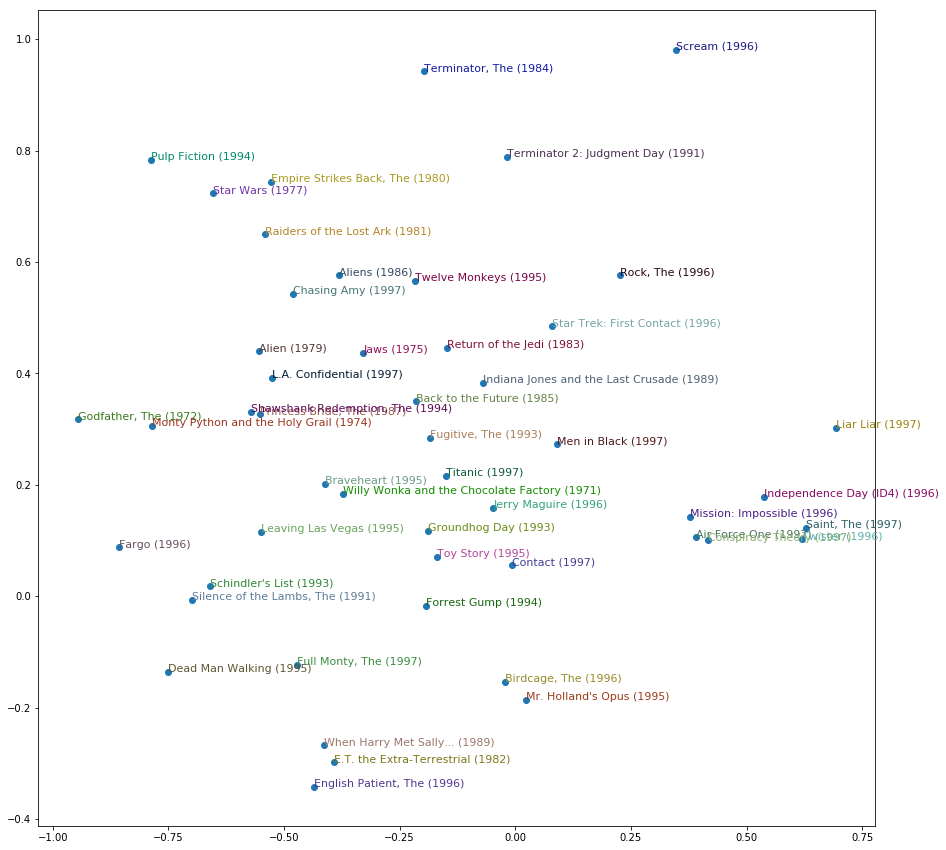

In [0]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
  plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()